In [151]:
import numpy as np
import matplotlib.pyplot as plt

A binary raster plot treats neuron as binary numbers (0,1)!
- 0 --> not fired
- 1 --> fired

<u>*Equation 1: Random Synaptic Input*</u>

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>I</mi>
  <mo stretchy="false">(</mo>
  <mi>t</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <msub>
    <mi>I</mi>
    <mrow data-mjx-texclass="ORD">
      <mi>m</mi>
      <mi>e</mi>
      <mi>a</mi>
      <mi>n</mi>
    </mrow>
  </msub>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">(</mo>
    <mn>1</mn>
    <mo>+</mo>
    <mn>0.1</mn>
    <msqrt>
      <mfrac>
        <msub>
          <mi>t</mi>
          <mrow data-mjx-texclass="ORD">
            <mi>m</mi>
            <mi>a</mi>
            <mi>x</mi>
          </mrow>
        </msub>
        <mrow>
          <mi mathvariant="normal">&#x394;</mi>
          <mi>t</mi>
        </mrow>
      </mfrac>
    </msqrt>
    <mstyle scriptlevel="0">
      <mspace width="0.167em"></mspace>
    </mstyle>
    <mi>&#x3BE;</mi>
    <mo stretchy="false">(</mo>
    <mi>t</mi>
    <mo stretchy="false">)</mo>
    <mo data-mjx-texclass="CLOSE">)</mo>
  </mrow>
  <mstyle scriptlevel="0">
    <mspace width="2em"></mspace>
  </mstyle>
  <mtext>with&#xA0;</mtext>
  <mi>&#x3BE;</mi>
  <mo stretchy="false">(</mo>
  <mi>t</mi>
  <mo stretchy="false">)</mo>
  <mo>&#x223C;</mo>
  <mrow data-mjx-texclass="ORD">
    <mi data-mjx-variant="-tex-calligraphic" mathvariant="script">U</mi>
  </mrow>
  <mo stretchy="false">(</mo>
  <mo>&#x2212;</mo>
  <mn>1</mn>
  <mo>,</mo>
  <mn>1</mn>
  <mo stretchy="false">)</mo>
</math>

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mrow data-mjx-texclass="ORD">
    <mi data-mjx-variant="-tex-calligraphic" mathvariant="script">U</mi>
  </mrow>
  <mo stretchy="false">(</mo>
  <mo>&#x2212;</mo>
  <mn>1</mn>
  <mo>,</mo>
  <mn>1</mn>
  <mo stretchy="false">)</mo>
</math> is the uniform distribution with support <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>x</mi>
  <mo>&#x2208;</mo>
  <mo stretchy="false">[</mo>
  <mo>&#x2212;</mo>
  <mn>1</mn>
  <mo>,</mo>
  <mn>1</mn>
  <mo stretchy="false">]</mo>
</math>

<u>*Equation 2: LIF Neuron membrane equation*</u>

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>V</mi>
  <mo stretchy="false">(</mo>
  <mi>t</mi>
  <mo>+</mo>
  <mi mathvariant="normal">&#x394;</mi>
  <mi>t</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mi>V</mi>
  <mo stretchy="false">(</mo>
  <mi>t</mi>
  <mo stretchy="false">)</mo>
  <mo>+</mo>
  <mfrac>
    <mrow>
      <mi mathvariant="normal">&#x394;</mi>
      <mi>t</mi>
    </mrow>
    <msub>
      <mi>&#x3C4;</mi>
      <mi>m</mi>
    </msub>
  </mfrac>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">(</mo>
    <msub>
      <mi>E</mi>
      <mi>L</mi>
    </msub>
    <mo>&#x2212;</mo>
    <mi>V</mi>
    <mo stretchy="false">(</mo>
    <mi>t</mi>
    <mo stretchy="false">)</mo>
    <mo>+</mo>
    <mi>R</mi>
    <mi>I</mi>
    <mo stretchy="false">(</mo>
    <mi>t</mi>
    <mo stretchy="false">)</mo>
    <mo data-mjx-texclass="CLOSE">)</mo>
  </mrow>
</math>

In [ ]:
def plot_simulation(t_range, v, raster):
    """
    Visualize LIF neuron with voltage traces, raster, and firing rate plots
    """
    # Calculate Mean Voltage
    v_mean = np.mean(v, axis=0)
    
    # Calculate Firing Rate (Hz)
    # Mean of raster (spikes/step) / dt (s/step) = spikes/second
    dt = t_range[1] - t_range[0]
    rate = np.mean(raster, axis=0) / dt

    plt.figure(figsize=(10, 8))

    # Panel 1: Voltage Traces
    ax1 = plt.subplot(3, 1, 1)
    for i in range(v.shape[0]):
        plt.scatter(t_range, v[i], color="k", marker=".", alpha=0.01)
    
    plt.plot(t_range, v_mean, 'C1', lw=2, label='Population Mean')
    plt.ylabel(r'$V_m$ (V)')
    plt.title('LIF Neuron Dynamics')
    plt.legend(loc='upper right')

    # Plot 2: Raster Plot (Optimized with imshow)
    plt.subplot(3, 1, 2, sharex=ax1)
    plt.imshow(raster, cmap='Greys', origin='lower', aspect='auto', interpolation='none',
               extent=[t_range[0], t_range[-1], 0, raster.shape[0]])
    plt.ylabel('Binary Raster Plot')

    # Plot 3: Firing Rate
    plt.subplot(3, 1, 3, sharex=ax1)
    plt.plot(t_range, rate, 'C1')
    plt.ylabel('Firing Rate (Hz)')
    plt.xlabel('Time (s)')

    plt.tight_layout()
    plt.show()

class LIFNeurons:
    def __init__(self, n=500, t_ref=2e-3, tau=20e-3, 
                 el=-70e-3, vr=-70e-3, vth=-50e-3, r=100e6, dt=1e-3):
        """
        Initializes the neuron properties.
        """
        self.n = n              # Number of neurons
        self.t_ref = t_ref      # Refractory period (s)
        self.tau = tau          # Membrane time constant
        self.el = el            # Leak potential
        self.vr = vr            # Reset potential
        self.vth = vth          # Firing threshold
        self.r = r              # Membrane resistance
        self.dt = dt            # Time step
        
    def ode_step(self, v_prev, i_step):
        """
        Evolves membrane potential by one step of discrete time integration.
        
        Args:
            v_prev (numpy array of floats)
                membrane potential at previous time step of shape (neurons)

            i_step (numpy array of floats)
                synaptic input at current time step of shape (neurons)

        Returns:
            v_new (numpy array of floats)
                membrane potential at current time step of shape (neurons)
        """
        # v[t] = v[t-1] + (dt/tau) * (el - v[t-1] + R*I) -> this is just LIF membrane equation
        v_new = v_prev + (self.dt / self.tau) * (self.el - v_prev + self.r * i_step)
        return v_new

    def spike_clamp(self, v_new, t, last_spike):
        """
        Handles Spiking (Threshold) and Clamping (Refractory).
        
        Args:
            v_new (numpy array of floats)
                membrane potential at current time step of shape (neurons)
            
            t (floats)
                current time point
            
            last_spike (floats)
                last time point when neuron spiked
        Returns: 
           v_final: voltage after resets/clamps are applied
           spiked: boolean array of who spiked
        """
        # 1. Refractory Period
        in_refractory = (t - last_spike) < self.t_ref
        # reset potential. reset to vr if in refractory and v is unchanged if not
        v_final = np.where(in_refractory, self.vr, v_new)

        # 2. Spiking (above threshold)
        spiked = v_final >= self.vth
        v_final[spiked] = self.vr
        
        return v_final, spiked

    def run(self, t_max, i_mean=2.5e-10):
        """
        Runs the simulation using the modular steps.
        """
        # 1. Setup Time
        t_range = np.arange(0, t_max, self.dt)
        steps = len(t_range) # 150 steps

        # 2. Current 
        # creating a matrix of size 500 neurons X 150 time steps. At each time step, the current is randomly determined for every single neuron by Equation 1.
        i = i_mean * (1 + 0.1 * (t_max / self.dt)**(0.5) * (2 * np.random.random([self.n, steps]) - 1))

        # 3. Initialize v, raster, last_spike
        v = self.el * np.ones([self.n, steps]) # Voltage history
        raster = np.zeros([self.n, steps])     # Spike raster, right now it's an 500X150 array of zeros
        last_spike = np.full(self.n, -np.inf)  # Time of last spike to be negative infinity, otherwise the code will think that the first time step 0.001 sec is within refractory period

        # 4. Integration Loop
        for step, t in enumerate(t_range):
            if step == 0: 
                continue
            
            v_proposed = self.ode_step(v[:, step-1], i[:, step])

            v_final, spiked = self.spike_clamp(v_proposed, t, last_spike)

            v[:, step] = v_final
            raster[spiked, step] = 1 # add 1 to the neuron that fires at specific time step
            last_spike[spiked] = t

        return t_range, v, raster

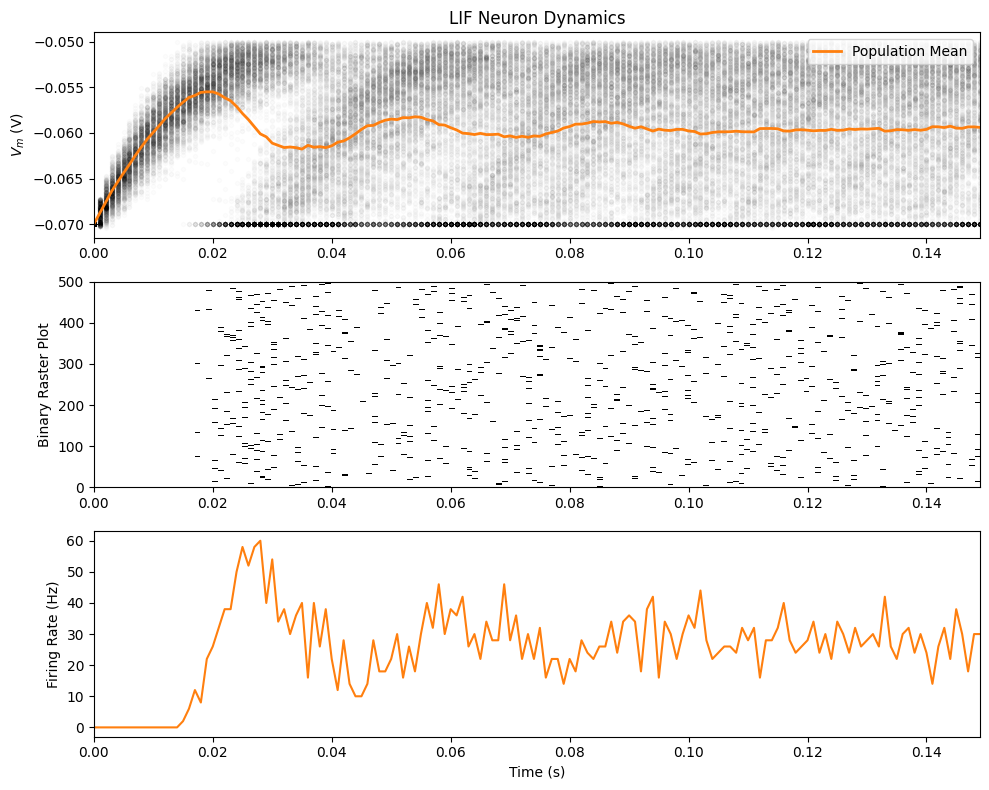

In [153]:
model = LIFNeurons(n=500, t_ref=0.005) 

t, v, raster = model.run(t_max=0.15)

plot_simulation(t, v, raster)